In [23]:
%reload_ext autoreload
%autoreload 2

In [1]:
import networkx
import json
import numpy as np
from eodc_pg_parser.graph import *
import random

In [2]:
pg_path = "../tests/data/s2_max_ndvi_global_parameter.json"

In [3]:
pg_1 = json.load(open(pg_path, mode="r"))

In [14]:
parsed_graph = OpenEOGraph(data=pg_1)

In [18]:
parsed_graph.G.nodes

NodeView((0, 1, 2, 3))

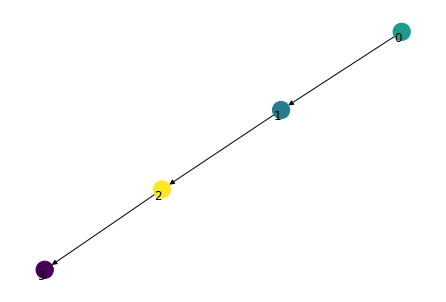

In [21]:
parsed_graph.plot()

In [13]:
next(nx.topological_sort(parsed_graph.G))

StopIteration: 

In [25]:
list(np.random.choice(range(256), size=3))

[32, 34, 1]

In [29]:
[random.randint(0, 255) for _ in range(3)]

[243, 61, 164]